In [1]:
cd /export/research/analysis/human/grosenberg/ugrant_20294/analysis_flair

/export/research/analysis/human/grosenberg/ugrant_20294/analysis_flair


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stats1 = pd.read_csv('wmh_stats.csv', sep='\t')
stats2 = pd.read_csv('wmh_stats_n2.csv', sep='\t')
stats3 = pd.read_csv('wmh_stats_n3.csv', sep ='\t')
stats4 = pd.read_csv('wmh_stats_n4.csv', sep = '\t')


In [4]:
stats1.head()

,Subject_Date_ID,WMH_1,WMH_2,Common,Only_1,Only_2,Dice
0,M87104356_20180327,6489,6422,5711,778,711,0.884672
1,M87104356_20180327,7059,6561,6420,639,141,0.942731
2,M87120729_20180406,10647,7987,7252,3395,735,0.778362
3,M87120729_20180406,11240,9483,9341,1899,142,0.901510
4,M87128932_20180306,5840,6176,4699,1141,1477,0.782124


In [5]:
# Will grab both raw and single dilation correction Dice values from stats1 below
dice01 = stats1[['Dice']].astype(float)   # Passing as list creates df instead of series
dice2 = stats2[['Dice']].astype(float)    
dice3 = stats3[['Dice']].astype(float)
dice4 = stats4[['Dice']].astype(float)

dice01.head()

,Dice
0,0.884672
1,0.942731
2,0.778362
3,0.901510
4,0.782124


In [6]:
dice0 = dice01[0::2].values
dice1 = dice01[1::2].values
dice2 = dice2[1::2].values
dice3 = dice3[1::2].values
dice4 = dice4[1::2].values

all_dice = np.concatenate([dice0, dice1, dice2, dice3, dice4], axis=1)
dice_df = pd.DataFrame(all_dice, columns=['d0','d1','d2','d3','d4'])

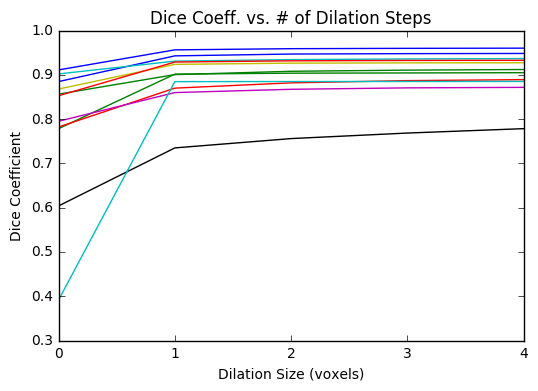

In [7]:
for idx in range(dice_df.shape[0]):
    
    plt.plot(dice_df.loc[idx].values)
    
plt.title('Dice Coeff. vs. # of Dilation Steps')
plt.xticks(range(5))
plt.xlabel('Dilation Size (voxels)')
plt.ylabel('Dice Coefficient')